In [1]:
print("Hello Jupyter")

Hello Jupyter


In [2]:
#library yang dipakai
import pandas as pd
import numpy as np
import openpyxl

#library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk analisis time series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#library untuk forecasting
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.SARIMAX import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [3]:
#memanggil Dataset
df = pd.read_excel('CO2 dataset.xlsx')

In [4]:
df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


In [5]:
#mengecek tipe data
df.dtypes

Year    float64
CO2     float64
dtype: object

In [6]:
df.head()

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


In [7]:
df.tail()

,Year,CO2
210,2010.0,15.6
211,2011.0,15.6
212,2012.0,14.8
213,2013.0,14.7
214,2014.0,15.1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [9]:
df.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [10]:
#transformasi data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [11]:
df.set_index('Year', inplace=True)

In [12]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [13]:
df.index.min(), df.index.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [14]:
if (df.index.max() - df.index.min() == 214):
    print("Data is Continous")

In [15]:
df.index.freq = 'YS'

<AxesSubplot:xlabel='Year'>

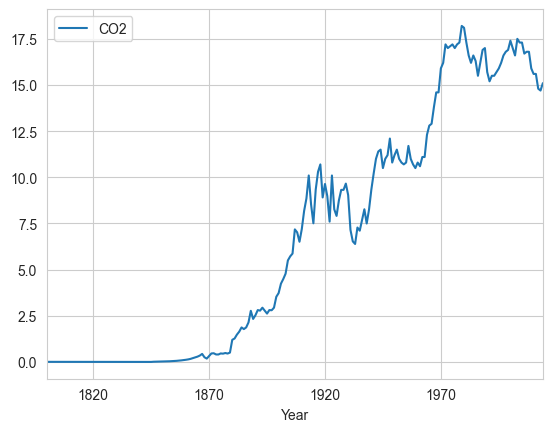

In [16]:
#Analisa Time Series
df.plot(grid=True)

In [17]:
train_df = df.loc[:'1991-01-01']
test_df = df.loc['1992-01-01':]

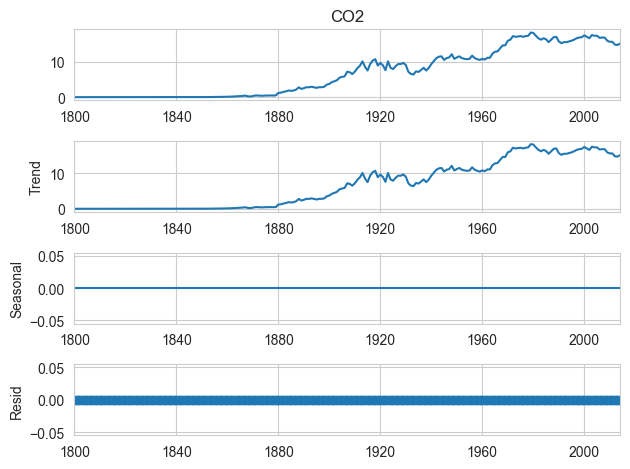

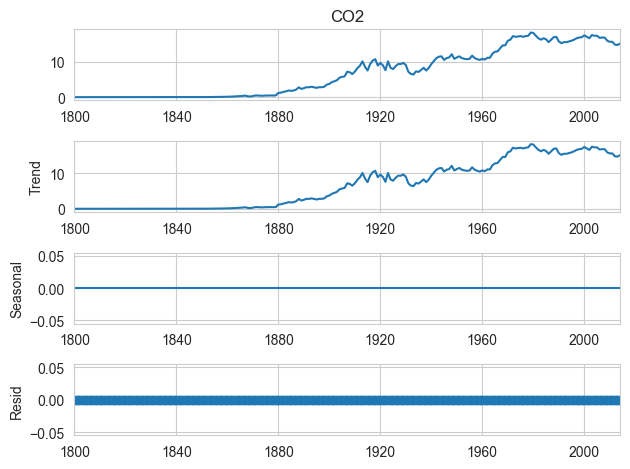

In [18]:
decompose_add = seasonal_decompose(df['CO2'])
decompose_add.plot()

In [19]:
def adf_test(timeseries):
    print('Hasil Testing Dickey-Fuller')
    print('------------------------------------------')
    adftest= adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observation Used'])
    for key, Value in adftest[4].items() :
        adf_output['Critical Value (%s)' %key] = Value
    print(adf_output)
    
adf_test(df.values)

Hasil Testing Dickey-Fuller
------------------------------------------
Test Statistic                 -0.378463
p-value                         0.913633
Lags Used                       0.000000
Number of Observation Used    214.000000
Critical Value (1%)            -3.461282
Critical Value (5%)            -2.875143
Critical Value (10%)           -2.574020
dtype: float64


In [20]:
diff_df = df.diff()
diff_df.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [21]:
diff_df.dropna(inplace=True)

<AxesSubplot:xlabel='Year'>

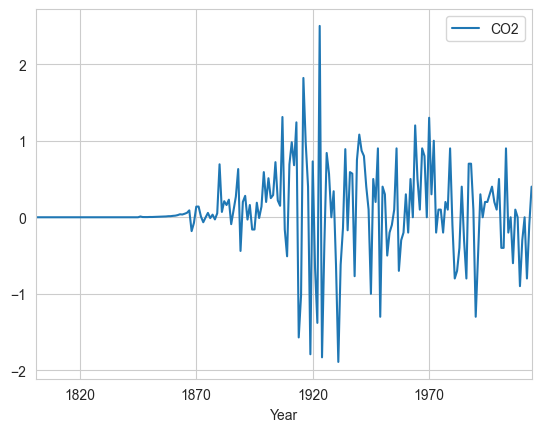

In [22]:
diff_df.plot(grid=True)

In [23]:
adf_test(diff_df)

Hasil Testing Dickey-Fuller
------------------------------------------
Test Statistic                 -3.780005
p-value                         0.003119
Lags Used                      15.000000
Number of Observation Used    198.000000
Critical Value (1%)            -3.463815
Critical Value (5%)            -2.876251
Critical Value (10%)           -2.574611
dtype: float64


D:\Python\myDeployTimeSeries\myTimeSeriesDeploy\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


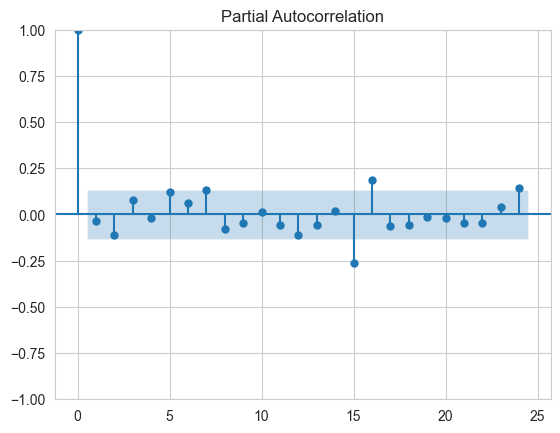

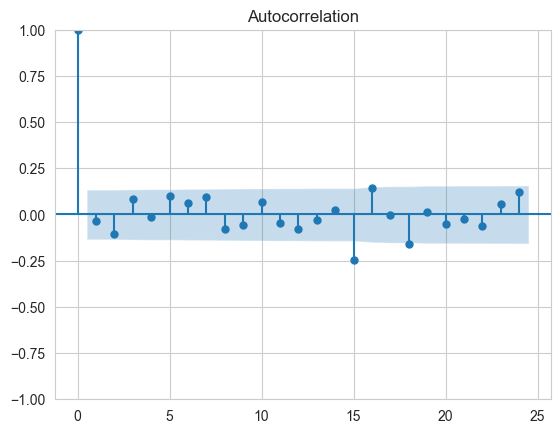

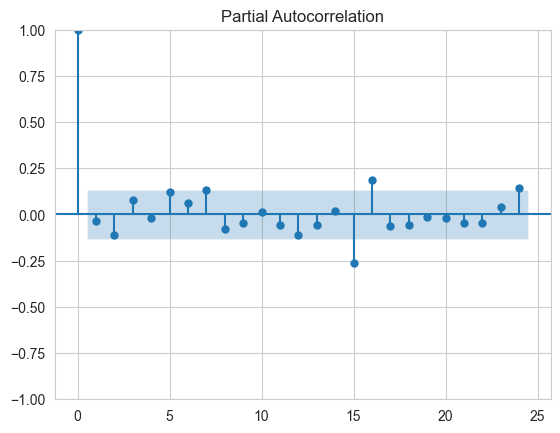

In [24]:
plot_acf(diff_df)
plot_pacf(diff_df)

In [25]:
#single Exponential Smooting
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(23)

<AxesSubplot:xlabel='Year'>

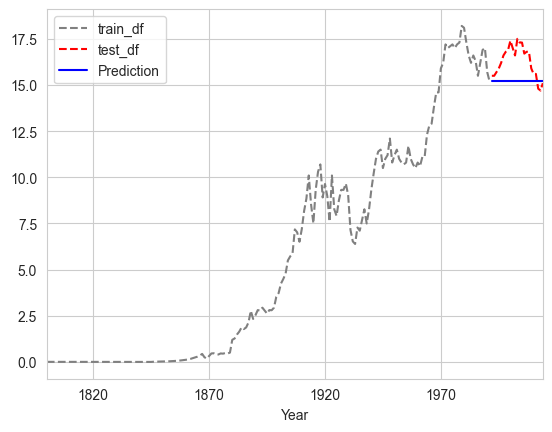

In [26]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')


In [27]:
print('Train RMSE   : ', mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE    : ', mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE   : ', mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE    : ', mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE   :  0.5646920026800123
Test RMSE    :  1.3429113022699568
Train MAPE   :  0.08470523420388641
Test MAPE    :  0.06861466412076216


In [28]:
#Double Exponential Smooting
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

<AxesSubplot:xlabel='Year'>

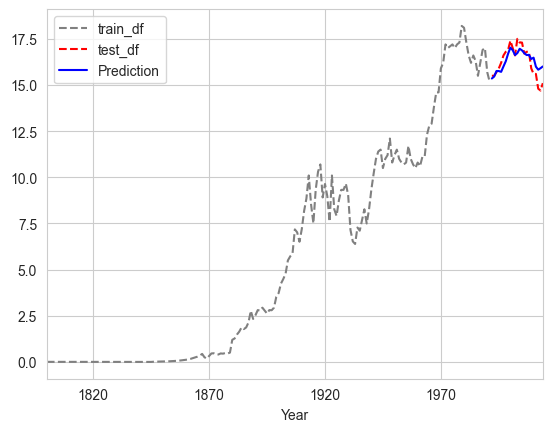

In [29]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [30]:
print('Train RMSE   : ', mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE    : ', mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE   : ', mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE    : ', mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE   :  0.5219963053098976
Test RMSE    :  0.5352724003498177
Train MAPE   :  12.806760394211791
Test MAPE    :  0.026063828196283362


In [31]:
#ARIMA
ar = ARIMA(train_df, order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(23)

D:\Python\myDeployTimeSeries\myTimeSeriesDeploy\.venv\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<AxesSubplot:xlabel='Year'>

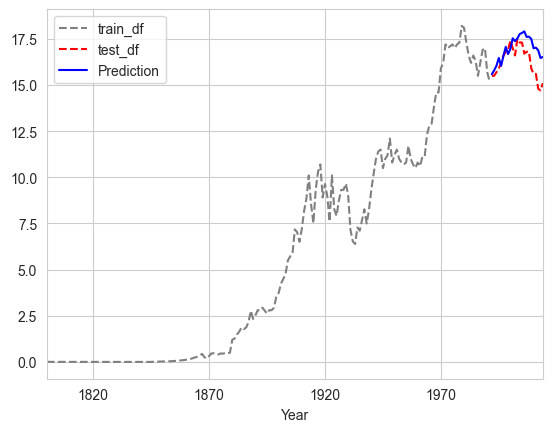

In [32]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='Prediction')

In [33]:
print('Train RMSE   : ', mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE    : ', mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE   : ', mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE    : ', mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE   :  0.4678568448321338
Test RMSE    :  0.9547767809199478
Train MAPE   :  0.08146753697415636
Test MAPE    :  0.047279376911162026


In [34]:
#Perbandingan Algoritma
comparision_df = pd.DataFrame(data=[
    ['Single Exp Smooting', 1.3429, 0.0686],
    ['Double Exp Smooting', 0.5352, 0.0260],
    ['ARIMA', 0.9549, 0.0472 ]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparision_df.set_index('Model', inplace=True)

In [35]:
comparision_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
Double Exp Smooting,0.5352,0.0260
ARIMA,0.9549,0.0472
Single Exp Smooting,1.3429,0.0686


In [36]:
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(50)

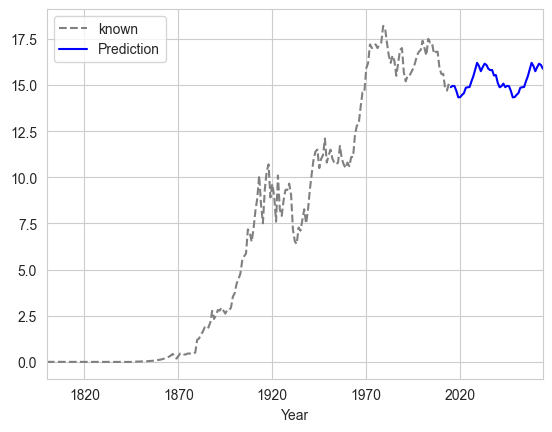

In [37]:
df['CO2'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred.plot(color='b', legend=True, label='Prediction')
plt.show()

In [38]:
import pickle

In [41]:
pickle.dump(double_exp, open('prediksi_CO2.pkl','wb'))

In [40]:
pickle.dump(double_exp, open('prediksi_CO2.csv','wb'))